In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact ,widgets
import scipy.stats as stats
import math

   # LOGISTIC REGRESSION #

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [7]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
lr.score(X_test,y_test)

0.9638888888888889

In [9]:
y_predicted=lr.predict(X_test)
from sklearn.metrics import confusion_matrix

In [10]:
cm=confusion_matrix(y_test,y_predicted)

In [11]:
cm

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 23,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  2,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  4, 37]], dtype=int64)

In [12]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 0 0 0 2 2 1 0 8 0] [0 3 0 0 0 2 2 0 0 6] [46 30 23 40 32 23 42 40 34 37] [314 327 337 320 326 333 315 320 318 317]


In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [14]:
lr_roc_auc=roc_auc_score(y_test,y_predicted)

ValueError: multiclass format is not supported

In [13]:
n=len(FP)

In [14]:
n

10

In [15]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[41, 32, 40, 38, 28, 30, 43, 36, 35, 37]


In [16]:
d=pd.DataFrame(M,columns=['logisticreg'])


In [17]:
d01=pd.DataFrame(FP,columns=['logisticregfp'])

In [18]:
d02=pd.DataFrame(TP,columns=['logisticregtp'])
d03=pd.DataFrame(y_predicted,columns=['prd'])

In [19]:
d

,logisticreg
0,41
1,32
2,40
3,38
4,28
5,30
6,43
7,36
8,35
9,37


In [20]:
d01

,logisticregfp
0,0
1,5
2,0
3,4
4,0
5,0
6,0
7,1
8,5
9,5


In [21]:
d02

,logisticregtp
0,41
1,27
2,40
3,34
4,28
5,30
6,43
7,35
8,30
9,32


In [22]:
d.to_csv("E:/univariate.csv")

In [23]:
df=pd.read_csv("E:/univariate.csv")
df

,Unnamed: 0,logisticreg
0,0,41
1,1,32
2,2,40
3,3,38
4,4,28
5,5,30
6,6,43
7,7,36
8,8,35
9,9,37


# DECISION TREE #

In [24]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
model.score(X_test,y_test)

0.8388888888888889

In [27]:
y_predicted=model.predict(X_test)

In [28]:
cm=confusion_matrix(y_test,y_predicted)

In [29]:
cm

array([[40,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1, 21,  1,  0,  0,  0,  0,  1,  4,  0],
       [ 1,  2, 34,  2,  0,  0,  0,  1,  1,  0],
       [ 0,  2,  1, 29,  0,  1,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 25,  0,  0,  3,  0,  1],
       [ 1,  1,  0,  0,  0, 25,  1,  1,  1,  2],
       [ 0,  0,  0,  1,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0, 34,  0,  2],
       [ 0,  1,  2,  0,  0,  0,  0,  0, 29,  2],
       [ 1,  3,  2,  1,  0,  1,  0,  4,  2, 23]], dtype=int64)

In [30]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[ 4  9  7  5  2  2  1 12  8  8] [ 1  7  7  7  4  7  1  5  5 14] [40 21 34 29 25 25 42 34 29 23] [315 323 312 319 329 326 316 309 318 315]


In [31]:
n=len(FP)

In [32]:
n

10

In [33]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[44, 30, 41, 34, 27, 27, 43, 46, 37, 31]


In [34]:
d1=pd.DataFrame(M,columns=['decisiontree'])

In [35]:
d11=pd.DataFrame(FP,columns=['decisiontreefp'])

In [36]:
d12=pd.DataFrame(TP,columns=['decisiontreetp'])
d13=pd.DataFrame(y_predicted,columns=['prd'])

In [37]:
d11

,decisiontreefp
0,4
1,9
2,7
3,5
4,2
5,2
6,1
7,12
8,8
9,8


# KNN CLASSIFIER(5) #

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
knn.score(X_test,y_test)

0.9777777777777777

In [42]:
y_predicted=knn.predict(X_test)

In [43]:
cm=confusion_matrix(y_test,y_predicted)

In [44]:
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  1,  0,  0,  0,  2,  0,  0,  1, 33]], dtype=int64)

In [45]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 3 0 0 0 2 1 1 1 0] [0 0 0 1 0 1 0 0 2 4] [41 28 41 35 29 31 43 39 32 33] [319 329 319 324 331 326 316 320 325 323]


In [46]:
n=len(FP)

In [47]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[41, 31, 41, 35, 29, 33, 44, 40, 33, 33]


In [48]:
d2=pd.DataFrame(M,columns=['knn'])

In [49]:
d21=pd.DataFrame(FP,columns=['knnfp'])

In [50]:
d22=pd.DataFrame(TP,columns=['knntp'])
d23=pd.DataFrame(y_predicted,columns=['prd'])

In [51]:
d2

,knn
0,41
1,31
2,41
3,35
4,29
5,33
6,44
7,40
8,33
9,33


In [52]:
d22

,knntp
0,41
1,28
2,41
3,35
4,29
5,31
6,43
7,39
8,32
9,33


# RANDOM FOREST #

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model=RandomForestClassifier(n_estimators=35)

In [55]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_predicted=model.predict(X_test)

In [57]:
model.score(X_test,y_test)

0.9527777777777777

In [58]:
cm=confusion_matrix(y_test,y_predicted)

In [59]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[1 4 1 2 1 3 0 1 3 1] [1 0 0 3 0 1 0 0 5 7] [40 28 41 33 29 31 43 39 29 30] [318 328 318 322 330 325 317 320 323 322]


In [60]:
n=len(FP)

In [61]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[41, 32, 42, 35, 30, 34, 43, 40, 32, 31]


In [62]:
d3=pd.DataFrame(M,columns=['rf'])
d31=pd.DataFrame(FP,columns=['rffp'])
d32=pd.DataFrame(TP,columns=['rftp'])
d33=pd.DataFrame(y_predicted,columns=['prd'])

# SUPPORT VECTOR  MACHINE #

In [63]:
from sklearn.svm import SVC

In [67]:
model=SVC(random_state=35,gamma='scale')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=35, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
y_predicted=model.predict(X_test)

In [69]:
model.score(X_test,y_test)

0.9833333333333333

In [70]:
cm=confusion_matrix(y_test,y_predicted)

In [71]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 2 0 0 0 1 1 0 1 1] [0 0 0 0 1 1 0 0 2 2] [41 28 41 36 28 31 43 39 32 35] [319 330 319 324 331 327 316 321 325 322]


In [72]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[41, 30, 41, 36, 28, 32, 44, 39, 33, 36]


In [73]:
d4=pd.DataFrame(M,columns=['svm'])
d41=pd.DataFrame(FP,columns=['svmfp'])
d42=pd.DataFrame(TP,columns=['svmtp'])
D43=pd.DataFrame(y_predicted,columns=['prd'])

# MLP #

In [74]:
from sklearn.neural_network import MLPClassifier

In [75]:
mlp=MLPClassifier(random_state=37)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=37, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)
mlp=MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
mlp.score(X_test_scaled,y_test)

0.9833333333333333

In [78]:
y_predicted=mlp.predict(X_test)

In [79]:
cm=confusion_matrix(y_test,y_predicted)

In [80]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[ 0 18  1  0  0  3  1  0 38  0] [ 4  0  5  9 14  3  6 10  2  8] [37 28 36 27 15 29 37 29 32 29] [319 314 318 324 331 325 316 321 288 323]


In [81]:
n=len(FP)

In [82]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[37, 46, 37, 27, 15, 32, 38, 29, 70, 29]


In [83]:
d5=pd.DataFrame(M,columns=['mlp'])
d51=pd.DataFrame(FP,columns=['mlpfp'])
d52=pd.DataFrame(TP,columns=['mlptp'])
d53=pd.DataFrame(y_predicted,columns=['prd'])

# NAIVE BAYES #

In [84]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [85]:
bnb=BernoulliNB(binarize=0.1)
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)

0.8333333333333334

In [86]:
y_predicted=bnb.predict(X_test)

In [87]:
cm=confusion_matrix(y_test,y_predicted)

In [88]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[ 1 11  0  5  5  3  2  4 13 16] [ 1  8  8  8  1  9  0  2 14  9] [40 20 33 28 28 23 43 37 20 28] [318 321 319 319 326 325 315 317 313 307]


In [89]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[41, 31, 33, 33, 33, 26, 45, 41, 33, 44]


In [90]:
d6=pd.DataFrame(M,columns=['bnb'])
d61=pd.DataFrame(FP,columns=['bnbfp'])
d62=pd.DataFrame(TP,columns=['bnbtp'])
d63=pd.DataFrame(y_predicted,columns=['prd'])

In [91]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_test,y_test)

0.8916666666666667

In [92]:
y_predicted=mnb.predict(X_test)

In [93]:
cm=confusion_matrix(y_test,y_predicted)

In [94]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[ 0 11  1  1  2  1  1  4 10  8] [1 4 4 7 1 4 1 2 8 7] [40 24 37 29 28 28 42 37 26 30] [319 321 318 323 329 327 316 317 316 315]


In [95]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[40, 35, 38, 30, 30, 29, 43, 41, 36, 38]


In [96]:
d7=pd.DataFrame(M,columns=['mnb'])
d71=pd.DataFrame(FP,columns=['mnbfp'])
d72=pd.DataFrame(TP,columns=['mnbtp'])
d73=pd.DataFrame(y_predicted,columns=['prd'])

In [97]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.8361111111111111

In [98]:
y_predicted=gnb.predict(X_test)

In [99]:
y_predicted=gnb.predict(X_test)

In [100]:
cm=confusion_matrix(y_test,y_predicted)

In [101]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[ 0 12  2  2  1  4  2 12 22  2] [ 0  3 16 11  4  4  1  2  4 14] [41 25 25 25 25 28 42 37 30 23] [319 320 317 322 330 324 315 309 304 321]


In [102]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[41, 37, 27, 27, 26, 32, 44, 49, 52, 25]


In [103]:
d8=pd.DataFrame(M,columns=['gnb'])
d81=pd.DataFrame(FP,columns=['gnbfp'])
d82=pd.DataFrame(TP,columns=['gnbtp'])
d83=pd.DataFrame(y_predicted,columns=['prd'])

# ONE WAY ANOVA TEST #

In [104]:
f,p= stats.f_oneway(d['logisticreg'],d1['decisiontree'],d2['knn'])

In [105]:
f,p

(0.0, 1.0)

In [106]:
alpha=float(input("enter the significance value"))
if(p<alpha):
    print("reject the null hypothesis")
else:
    print("reject alternate hypothesis")

enter the significance value0.05
reject alternate hypothesis


# MANOVA TEST(BIVARIATE) #

In [107]:
import pandas as pd
import seaborn as sns

In [108]:
d=pd.read_csv("E:/univariate.csv")
d

,Unnamed: 0,logisticreg
0,0,41
1,1,32
2,2,40
3,3,38
4,4,28
5,5,30
6,6,43
7,7,36
8,8,35
9,9,37


In [109]:
d_melt = pd.melt(d, id_vars=['values'], value_vars=['logisticreg', 'decisiontree', 'knn8'])
# replace column names
d_melt.columns = ['values', 'classifiers', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="values", y="value", hue="classifiers", data=d_melt, palette="Set3") 

KeyError: "The following 'id_vars' are not present in the DataFrame: ['values']"

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
model = ols('value ~ C(values) + C(classifiers) + C(values):C(classifiers)', data=d_melt).fit()

In [72]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [74]:
anova_table

,sum_sq,df,F,PR(>F)
C(values),1.338027e+04,1.0,6.318069e+02,1.770362e-31
C(classifiers),5.863866e-28,2.0,1.384438e-29,1.000000e+00
C(values):C(classifiers),3.361333e+02,2.0,7.935992e+00,9.515873e-04
Residual,1.143600e+03,54.0,NaN,NaN


The P-value obtained from ANOVA analysis for values, classifiers, and interaction are statistically significant (P<0.05). We conclude that type of values significantly affects the yield outcome, different classifier algorithms significantly affect the yield outcome, and interaction of both values and classifiers algorithm significantly affects the yield outcome.
# so we reject null hypothesis #

In [122]:
d=pd.read_csv("E:/d.csv")
d

,lr,dt,knn
0,41,41,41
1,32,32,32
2,40,40,40
3,38,38,38
4,28,28,28
5,30,29,30
6,42,43,43
7,45,46,44
8,35,37,34
9,37,36,37


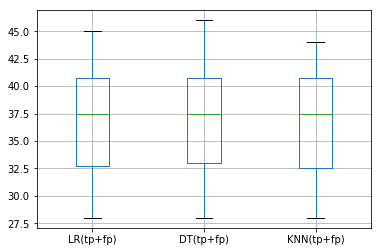

In [123]:
pd.DataFrame({'LR(tp+fp)':d.lr,'DT(tp+fp)':d.dt,'KNN(tp+fp)':d.knn}).boxplot()